#Importing the Necessary Libraries

In [ ]:
!pip install Keras-Preprocessing
!pip install ktrain
#!pip install pyLDAvis scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 31.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 19.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 653.6/653.6 kB 31.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 39.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 35.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re
import pickle
import joblib
import nltk
from nltk.text import Text
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords, reuters, brown, gutenberg
from nltk.stem import WordNetLemmatizer
from collections import Counter
from textblob import Word
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score, cross_val_predict
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, f1_score, recall_score
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential, load_model
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras_preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Activation, Dense, Embedding, LSTM, SpatialDropout1D, Dropout, Flatten, GRU, Conv1D, MaxPooling1D, Bidirectional
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests
from keras.regularizers import l2
import ktrain
from ktrain import text
import gensim
#import pyLDAvis
#import pyLDAvis.gensim_models as gensimvis
sns.set()
%matplotlib inline
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('gutenberg')
nltk.download('brown')
nltk.download("reuters")
nltk.download('words')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

#Loading the Dataset

In [ ]:
df=pd.read_csv("/content/Accuracy_Final_Twitter_Suicide_Dataset.csv", engine='python', encoding='UTF-8')
df=df.replace('Potential Suicide post ','Potential Suicide post')

In [ ]:
df.head(5)

,Tweet,Suicide
0,You guys would be better off without me anyways,Potential Suicide post
1,ah.... 90's pop was so good,Not Suicide post
2,Unfortunately I canât leave well enough alon...,Potential Suicide post
3,is a bit happier. She found her Chanel sunglas...,Not Suicide post
4,"If death came knocking at my door right now, I...",Potential Suicide post


#Exploratory Data Analysis(EDA)

In [ ]:
df.shape

(2436, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2436 entries, 0 to 2435
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Tweet    2434 non-null   object
 1   Suicide  2436 non-null   object
dtypes: object(2)
memory usage: 38.2+ KB


In [ ]:
df.describe().T

,count,unique,top,freq
Tweet,2434,2324,kill myself.,19
Suicide,2436,2,Not Suicide post,1373


In [ ]:
df['Suicide'].value_counts()

Not Suicide post          1373
Potential Suicide post    1063
Name: Suicide, dtype: int64

In [ ]:
df.isna().sum()

Tweet      2
Suicide    0
dtype: int64

In [ ]:
df['Tweet']=df['Tweet'].fillna("")
df.isna().sum()

Tweet      0
Suicide    0
dtype: int64

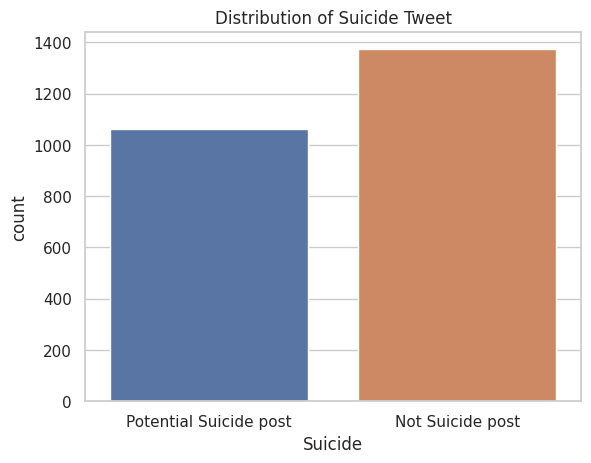

In [ ]:
sns.set_theme(style="whitegrid")
sns.countplot(x=df["Suicide"])
plt.title('Distribution of Suicide Tweet')
plt.show()

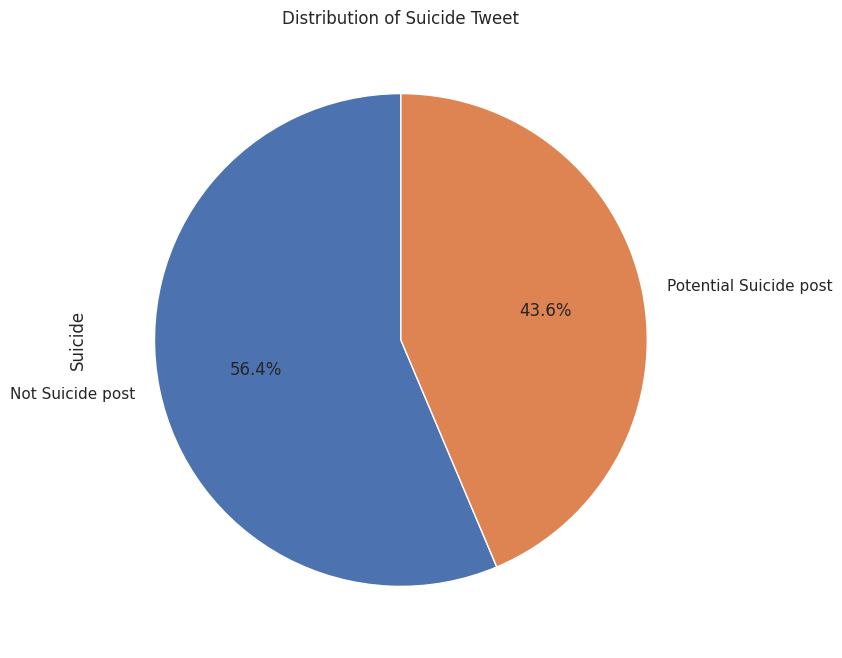

In [ ]:
plt.figure(figsize=(8, 8))
df['Suicide'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, explode=[0.0, 0] )
plt.title('Distribution of Suicide Tweet')
plt.show()

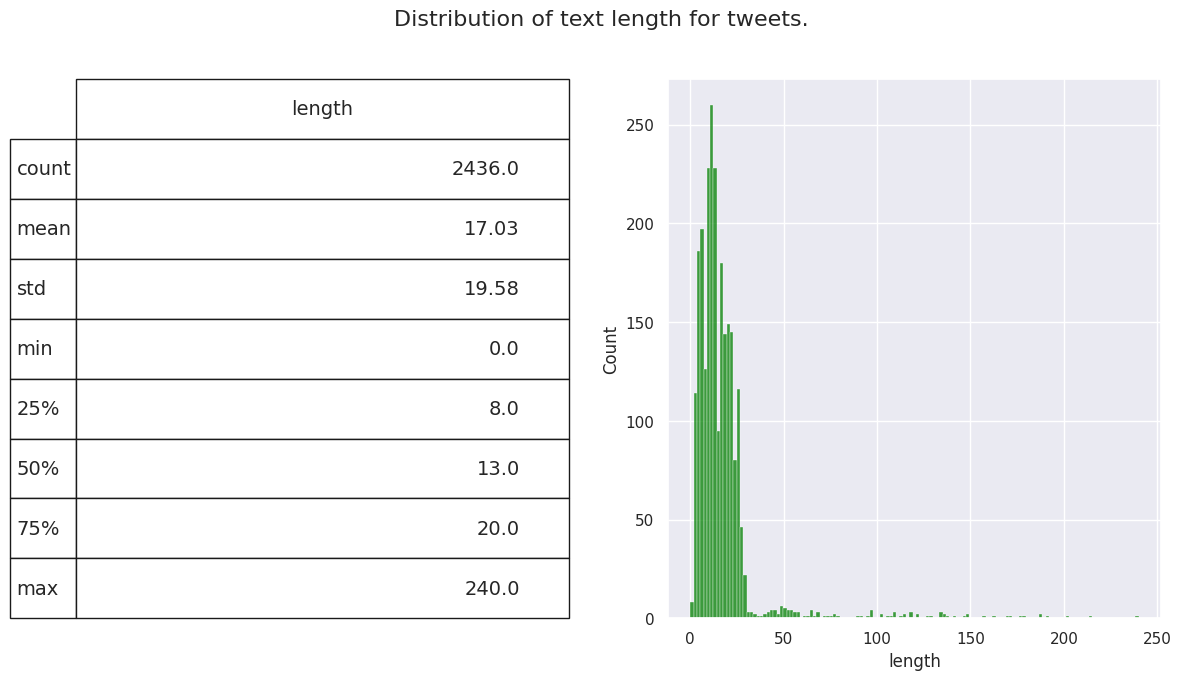

In [ ]:
fig = plt.figure(figsize=(14,7))
df['length'] = df.Tweet.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df['length'], ax=ax1,color='green')
describe = df.length.describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for tweets.', fontsize=16)

plt.show()

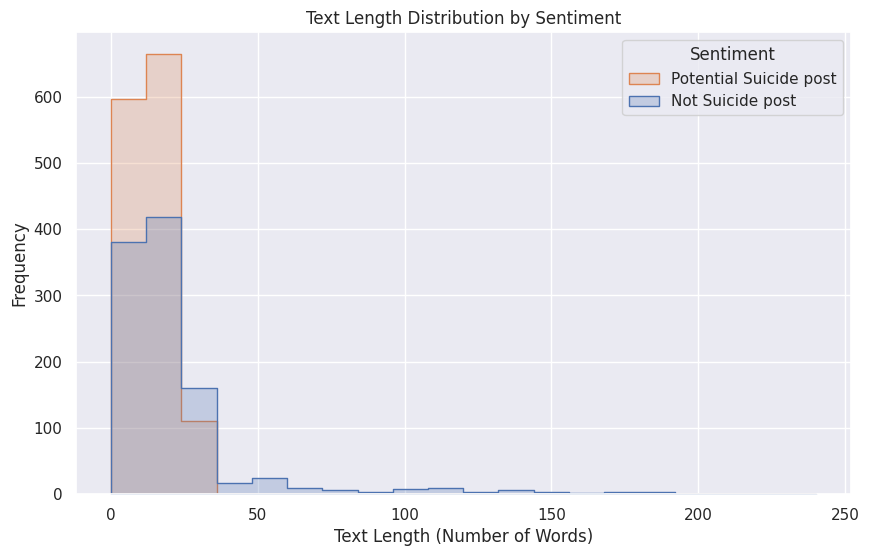

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='length', hue='Suicide', bins=20, element='step')
plt.title("Text Length Distribution by Sentiment")
plt.xlabel("Text Length (Number of Words)")
plt.ylabel("Frequency")

unique_sentiments = df['Suicide'].unique()
plt.legend(title="Sentiment", labels=unique_sentiments)

plt.show()

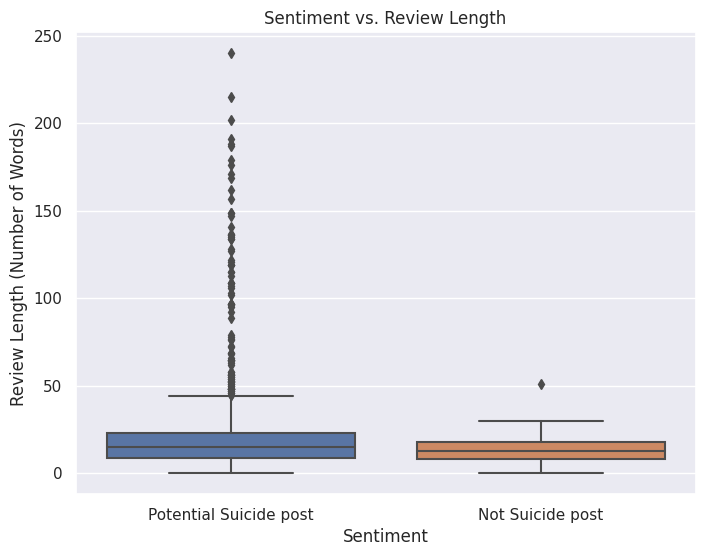

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Suicide', y='length', data=df)
plt.title("Sentiment vs. Review Length")
plt.xlabel("Sentiment")
plt.ylabel("Review Length (Number of Words)")
plt.show()

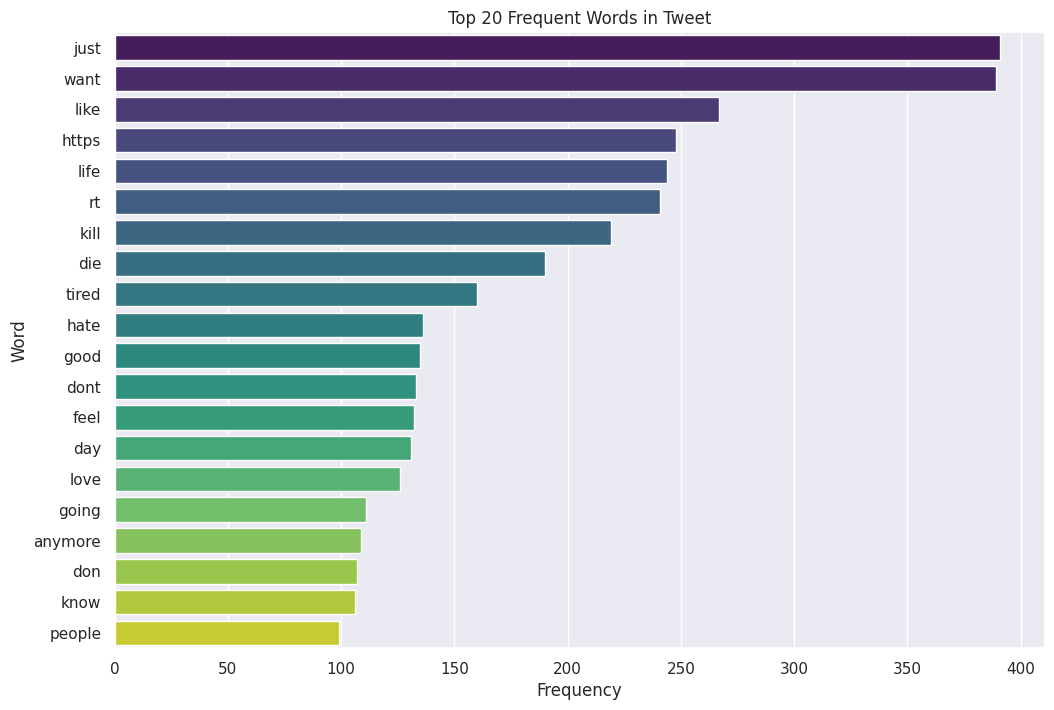

In [ ]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Tweet'])

word_freq = pd.DataFrame(X.sum(axis=0), columns=vectorizer.get_feature_names_out())
top_words = word_freq.transpose().sort_values(0, ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_words[0], y=top_words.index, palette="viridis")
plt.title('Top 20 Frequent Words in Tweet')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

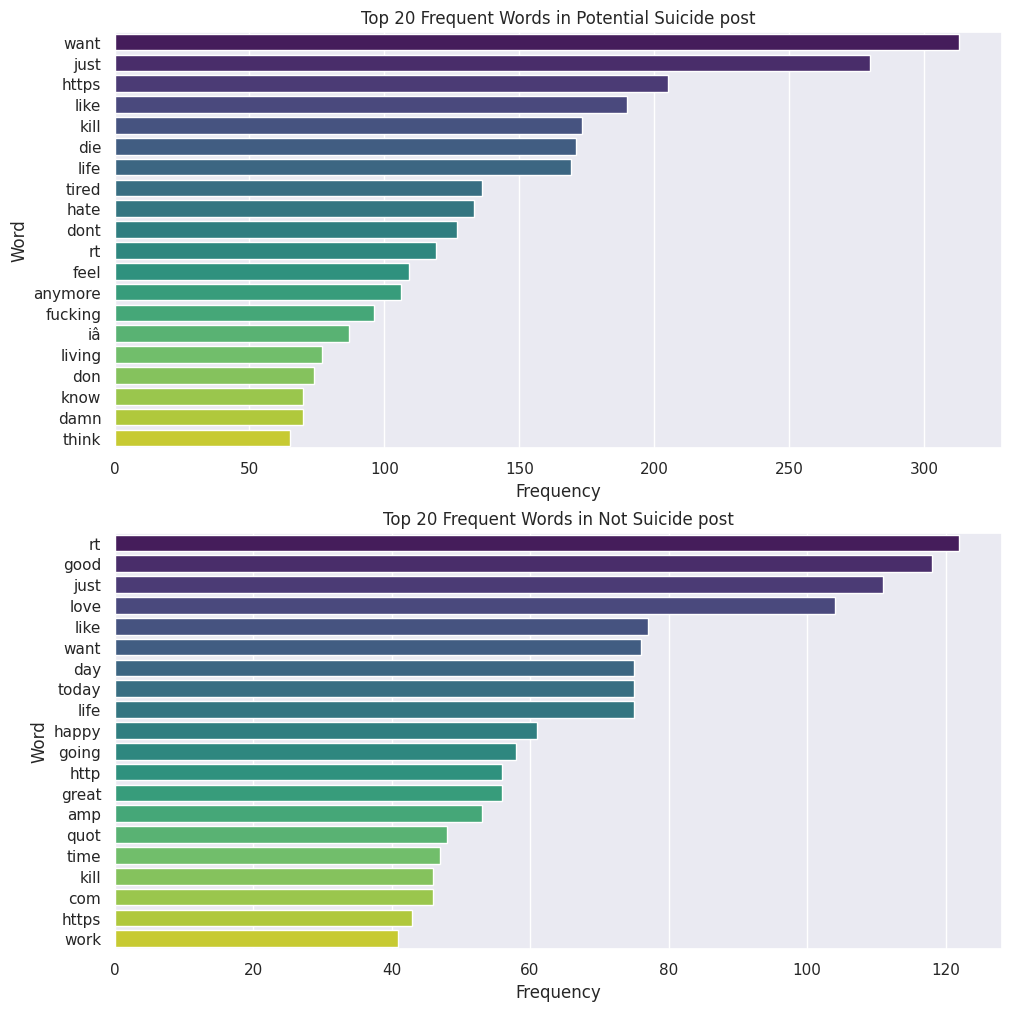

In [ ]:
fig, axes = plt.subplots(nrows=len(df['Suicide'].unique()), ncols=1, figsize=(10, 10), constrained_layout=True)

for ax, category in zip(axes, df['Suicide'].unique()):
    subset_df = df[df['Suicide'] == category]

    X = vectorizer.fit_transform(subset_df['Tweet'])
    word_freq = pd.DataFrame(X.sum(axis=0), columns=vectorizer.get_feature_names_out())
    top_words = word_freq.transpose().sort_values(0, ascending=False).head(20)

    sns.barplot(x=top_words[0], y=top_words.index, palette="viridis", ax=ax)
    ax.set_title(f'Top 20 Frequent Words in {category}')
    ax.set_xlabel('Frequency')
    ax.set_ylabel('Word')

plt.show()

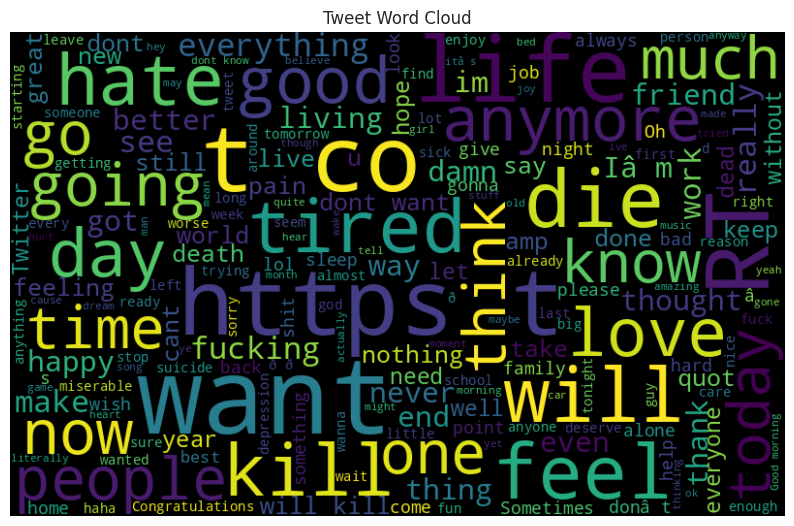

In [ ]:
normal_words =' '.join([text for text in df['Tweet']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Tweet Word Cloud')
plt.axis('off')
plt.show()

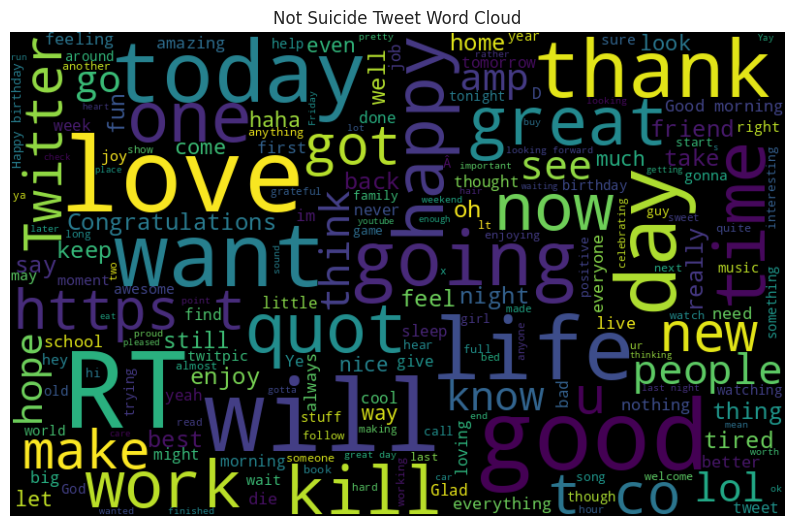

In [ ]:
normal_words =' '.join([text for text in df['Tweet'][df['Suicide'] == 'Not Suicide post']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Not Suicide Tweet Word Cloud')
plt.axis('off')
plt.show()

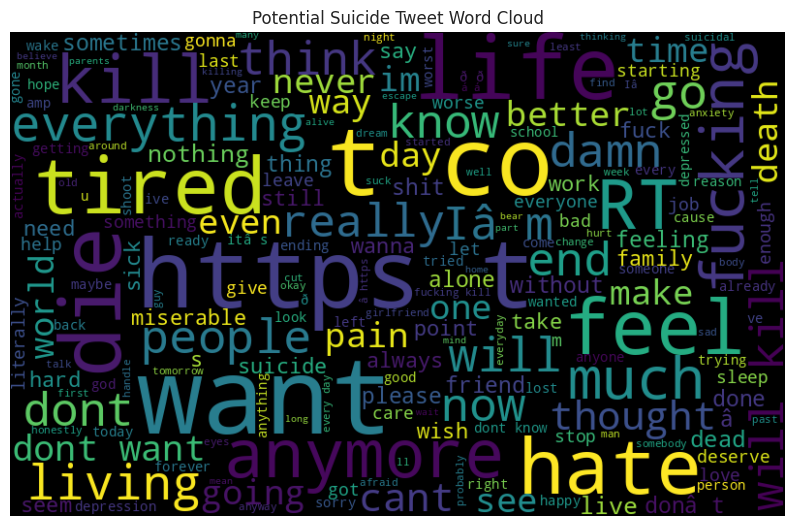

In [ ]:
normal_words =' '.join([text for text in df['Tweet'][df['Suicide'] == 'Potential Suicide post']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Potential Suicide Tweet Word Cloud')
plt.axis('off')
plt.show()

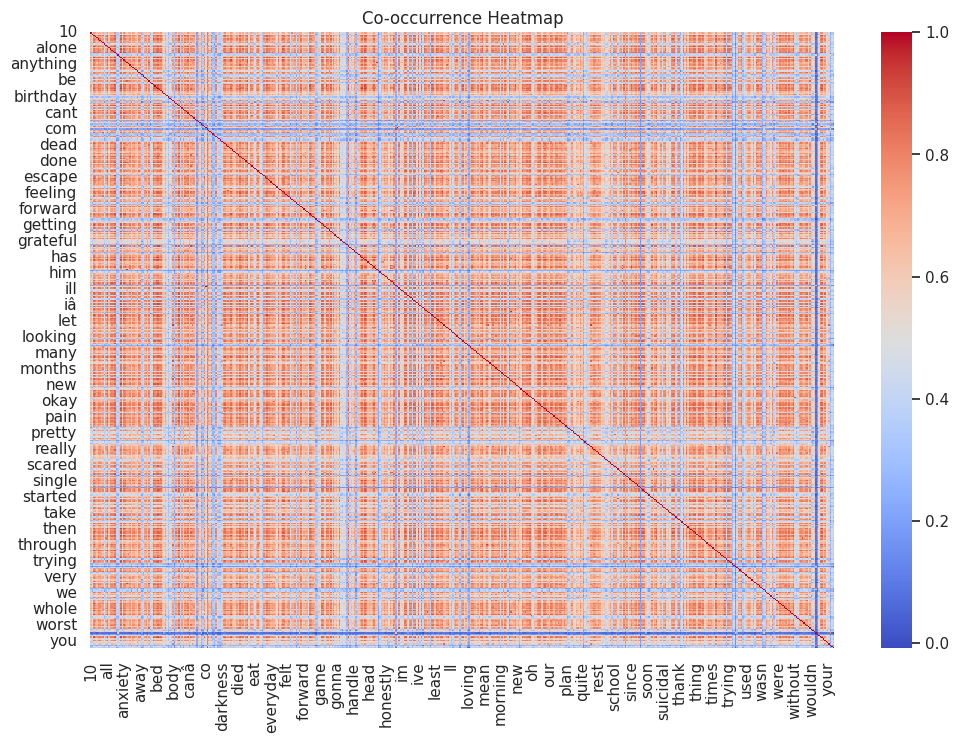

In [ ]:
vectorizer = CountVectorizer(max_features=500)
X = vectorizer.fit_transform(df['Tweet'])

co_occurrence = (X.T * X)
co_occurrence_df = pd.DataFrame(co_occurrence.toarray(), columns=vectorizer.get_feature_names_out())

plt.figure(figsize=(12, 8))
sns.heatmap(co_occurrence_df.corr(), cmap='coolwarm', annot=False)
plt.title("Co-occurrence Heatmap")
plt.show()

In [ ]:
texts = [tweet.split() for tweet in df['Tweet']]
dictionary = gensim.corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

lda_model = gensim.models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


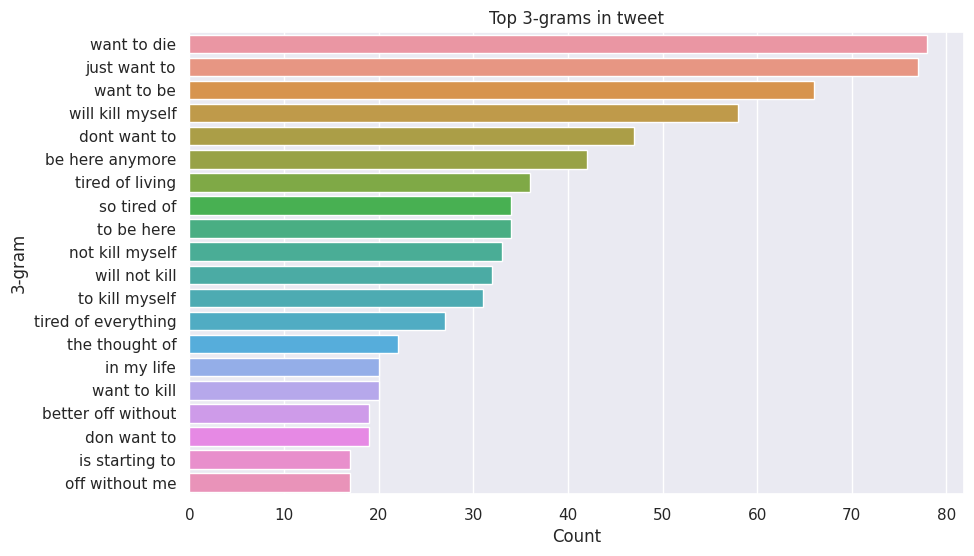

In [ ]:
vectorizer = CountVectorizer(ngram_range=(3, 3))
X_ngrams = vectorizer.fit_transform(df['Tweet'])

ngram_counts = X_ngrams.sum(axis=0)
ngram_list = vectorizer.get_feature_names_out()
ngram_counts = ngram_counts.tolist()[0]

ngram_dict = {'ngram': ngram_list, 'count': ngram_counts}
ngram_df = pd.DataFrame(ngram_dict)

ngram_df = ngram_df.sort_values(by='count', ascending=False)
top_ngrams = ngram_df.head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='ngram', data=top_ngrams)
plt.title(f"Top {ngram_range[0]}-grams in tweet")
plt.xlabel("Count")
plt.ylabel(f"{ngram_range[0]}-gram")
plt.show()

In [ ]:
all_tweet = ' '.join(df['Tweet'])
tokens = word_tokenize(all_tweet)
text = Text(tokens)

word_to_plot = "bad"
text.concordance(word_to_plot, width=100)

Displaying 25 of 37 matches:
e become hyper aware of my mood swings they get bad enough where i can barely get out of bed talk t
ry itâs so terrible I need to work on this so bad before I end up doing something that fuâ¦ - Io
g @ juliankimmings My commiserations , is it as bad as I had heard it is ? @ ravogd my weird dreams
ake comfort in the fact that if it ever gets so bad I could do it . Knowing myself , it 's probably
o that and it makes life torture its especially bad now because i dont know what the fucki am doing
 i want to have one because being a virgin is a bad thing and i could never live with that feeling 
aking me feel fat and I 'm so done with feeling bad about my body and constâ¦ I 'm just so tired o
l and calming . RT @ poemsandthongs : the kinda bad bitch that 's ready to die anyday now Had a goo
ike this is the only way i want to make all the bad go away how do i do this how do i help her cope
Rt 's Paul My grandpas wrist is bleeding really bad he cut it on accide

#Text Preprocessing for Twitter Suicide Dataset

In [ ]:
english_words = set(nltk.corpus.words.words())
for w in reuters.words():
  english_words.add(w)
for w in brown.words():
  english_words.add(w)
for w in gutenberg.words():
  english_words.add(w)

def clean_text(text):
    lower_case = text.lower()
    tokenizer = RegexpTokenizer(r'\w+')
    special_word = tokenizer.tokenize(lower_case)

    stop = [word for word in stopwords.words('english') if word not in ["my", "haven't", "aren't", "can", "no",
                                                                         "why", "through", "herself", "she", "he",
                                                                         "himself", "you", "you're", "myself", "not",
                                                                         "here", "some", "do", "does", "did", "will",
                                                                         "don't", "doesn't", "didn't", "won't", "should",
                                                                         "should've", "couldn't", "mightn't", "mustn't",
                                                                         "shouldn't", "hadn't", "wasn't", "wouldn't"]]

    stop_words = [item for item in special_word if item not in stop]
    stop_words_str = ' '.join(stop_words)
    short_word = re.findall(r'\w{2,}', stop_words_str)


    non_english = " ".join(x for x in short_word if x in english_words)

    lemmatizer = WordNetLemmatizer()
    lemmatized_text = " ".join([lemmatizer.lemmatize(word) for word in non_english.split()])

    return lemmatized_text

df['tweet'] = df['Tweet'].apply(clean_text)

In [ ]:
df.tweet.apply(lambda x: len(x.split(" "))).mean()

8.782840722495894

In [ ]:
df.head(5)

,Tweet,Suicide,length,tweet
0,You guys would be better off without me anyways,Potential Suicide post,9,you guy would better without anyways
1,ah.... 90's pop was so good,Not Suicide post,6,ah 90 pop good
2,Unfortunately I canât leave well enough alon...,Potential Suicide post,11,unfortunately leave well enough alone co
3,is a bit happier. She found her Chanel sunglas...,Not Suicide post,9,bit happier she found
4,"If death came knocking at my door right now, I...",Potential Suicide post,14,death came knocking my door right hesitate answer


#Machine Learning Models

##Text Vectorization and Train-Test Split for Twitter Suicide Dataset

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df["tweet"],df["Suicide"], test_size = 0.20, random_state = 42)
count_vect = CountVectorizer(ngram_range=(1, 2))
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)
x_train_counts = count_vect.fit_transform(x_train)
x_train_tfidf = transformer.fit_transform(x_train_counts)

x_test_counts = count_vect.transform(x_test)
x_test_tfidf = transformer.transform(x_test_counts)

print (x_train_tfidf.shape,x_test_tfidf.shape, y_train.shape, y_test.shape)

(1948, 14719) (488, 14719) (1948,) (488,)


##Logistic Regression Model with Hyperparameter Tuning and Evaluation

In [ ]:
lr = LogisticRegression(solver='sag', max_iter=200)

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'max_iter': [200, 300, 500],
}

grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(x_train_tfidf, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_lr_model = grid_search.best_estimator_
y_pred1 = best_lr_model.predict(x_test_tfidf)

accuracy = accuracy_score(y_test, y_pred1) * 100
classification_rep = classification_report(y_test, y_pred1)

print(f"Accuracy : {accuracy:.2f}%")
print("Classification Report:")
print(classification_rep)

Best Hyperparameters: {'C': 10, 'max_iter': 200}
Accuracy : 93.85%
Classification Report:
                        precision    recall  f1-score   support

      Not Suicide post       0.94      0.95      0.94       271
Potential Suicide post       0.93      0.93      0.93       217

              accuracy                           0.94       488
             macro avg       0.94      0.94      0.94       488
          weighted avg       0.94      0.94      0.94       488



Text(91.25, 0.5, 'Actual values')

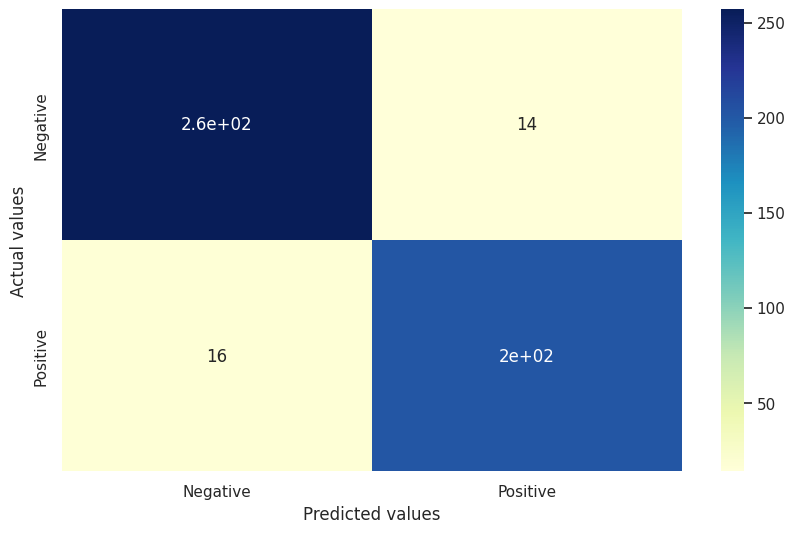

In [ ]:
cm = confusion_matrix(y_test, y_pred1)

plt.figure(figsize = (10,6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [ ]:
scores = cross_val_score(best_lr_model, x_train_tfidf,y_train, cv=10)
print(accuracy_score(y_test,y_pred1))
print ("Cross-validated scores:", scores)

0.9385245901639344
Cross-validated scores: [0.91282051 0.85641026 0.8974359  0.92820513 0.9025641  0.94358974
 0.88205128 0.92307692 0.91752577 0.91237113]


##Support Vector Machine Model with Hyperparameter Tuning and Evaluation

In [ ]:
param_grid = {
    'C': [0.1, 0.5, 1, 10],
    'max_iter': [500, 1000, 1500]
}

svc = LinearSVC()

grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(x_train_tfidf, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_svc_model = grid_search.best_estimator_

y_pred2 = best_svc_model.predict(x_test_tfidf)

accuracy = accuracy_score(y_test, y_pred2) * 100
classification_rep = classification_report(y_test, y_pred2)

print(f"Accuracy: {accuracy:.2f}%")
print("Classification Report:")
print(classification_rep)

Best Hyperparameters: {'C': 10, 'max_iter': 500}
Accuracy: 92.83%
Classification Report:
                        precision    recall  f1-score   support

      Not Suicide post       0.95      0.92      0.93       271
Potential Suicide post       0.91      0.94      0.92       217

              accuracy                           0.93       488
             macro avg       0.93      0.93      0.93       488
          weighted avg       0.93      0.93      0.93       488



Text(91.25, 0.5, 'Actual values')

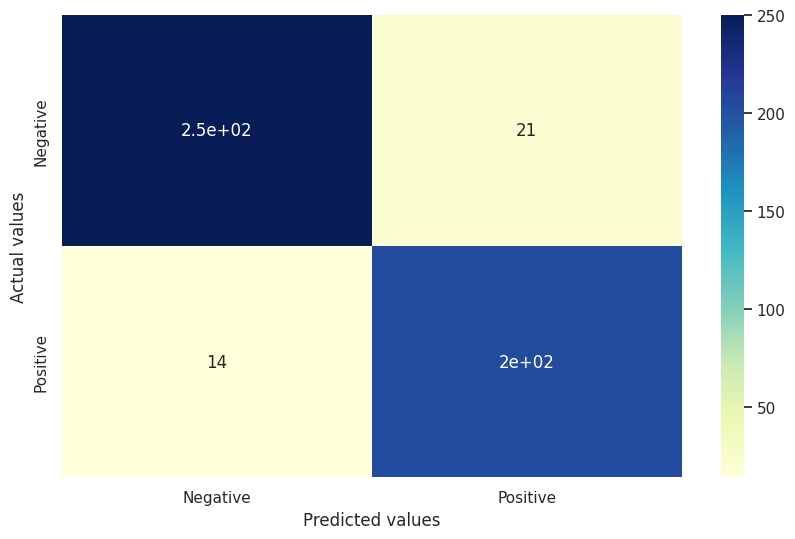

In [ ]:
cm = confusion_matrix(y_test, y_pred2)

plt.figure(figsize = (10,6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [ ]:
scores = cross_val_score(best_svc_model, x_train_tfidf,y_train, cv=10)
print(accuracy_score(y_test,y_pred2))
print ("Cross-validated scores:", scores)

0.9282786885245902
Cross-validated scores: [0.91282051 0.86666667 0.91282051 0.94358974 0.91794872 0.94358974
 0.88205128 0.92820513 0.91752577 0.93298969]


In [ ]:
joblib.dump(svc, 'Suicide_SVM.pkl')
#model = joblib.load('Suicide_SVM.pkl')

['Suicide_SVM.pkl']

##Multinomial Naive Bayes Model with Hyperparameter Tuning and Evaluation

In [ ]:
mnb = MultinomialNB()

param_grid = {
    'alpha': [0.1,0.2, 0.3, 0.8, 1.0, 10.0],
}

grid_search = GridSearchCV(mnb, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train_tfidf, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_mnb_model = grid_search.best_estimator_
y_pred3 = best_mnb_model.predict(x_test_tfidf)

accuracy = accuracy_score(y_test, y_pred3)
classification_rep = classification_report(y_test, y_pred3)

print(f"Accuracy: {accuracy:.2f}%")
print("Classification Report:")
print(classification_rep)

Best Hyperparameters: {'alpha': 1.0}
Accuracy: 0.93%
Classification Report:
                        precision    recall  f1-score   support

      Not Suicide post       0.94      0.93      0.94       271
Potential Suicide post       0.92      0.93      0.92       217

              accuracy                           0.93       488
             macro avg       0.93      0.93      0.93       488
          weighted avg       0.93      0.93      0.93       488



Text(91.25, 0.5, 'Actual values')

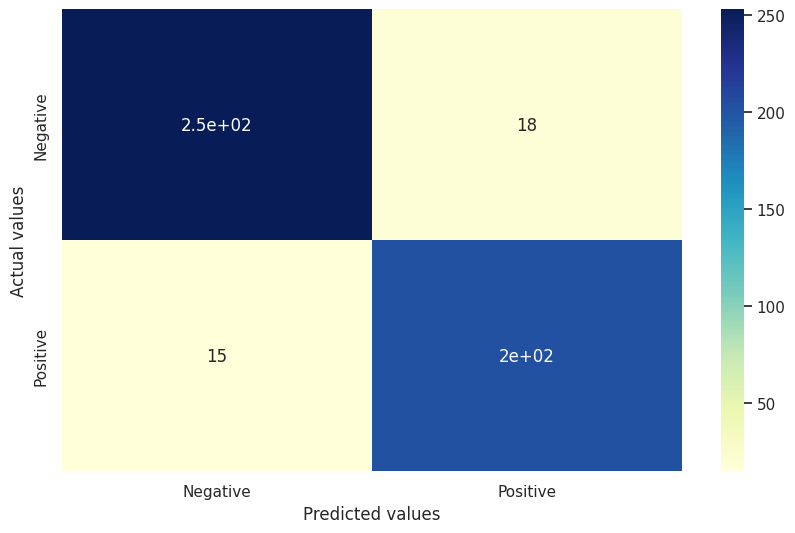

In [ ]:
cm = confusion_matrix(y_test, y_pred3)

plt.figure(figsize = (10,6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [ ]:
scores = cross_val_score(best_mnb_model, x_train_tfidf,y_train, cv=10)
print(accuracy_score(y_test,y_pred3))
print ("Cross-validated scores:", scores)

0.9323770491803278
Cross-validated scores: [0.88717949 0.85641026 0.91282051 0.92307692 0.9025641  0.94871795
 0.87179487 0.9025641  0.89690722 0.89175258]


##Randomforest Model with Hyperparameter Tuning and Evaluation


In [ ]:
param_grid = {
    'n_estimators': [ 500, 1000, 1500],
    'max_depth': [None, 5, 10, 15],
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf, param_grid, cv=2, scoring='accuracy', n_jobs=-1)

grid_search.fit(x_train_tfidf, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_rf_model = grid_search.best_estimator_
y_pred4 = best_rf_model.predict(x_test_tfidf)

accuracy = accuracy_score(y_test, y_pred4) * 100
classification_rep = classification_report(y_test, y_pred4)

print(f"Accuracy : {accuracy:.2f}%")
print("Classification Report:")
print(classification_rep)

Best Hyperparameters: {'max_depth': None, 'n_estimators': 1000}
Accuracy : 92.83%
Classification Report:
                        precision    recall  f1-score   support

      Not Suicide post       0.92      0.95      0.94       271
Potential Suicide post       0.94      0.90      0.92       217

              accuracy                           0.93       488
             macro avg       0.93      0.93      0.93       488
          weighted avg       0.93      0.93      0.93       488



Text(91.25, 0.5, 'Actual values')

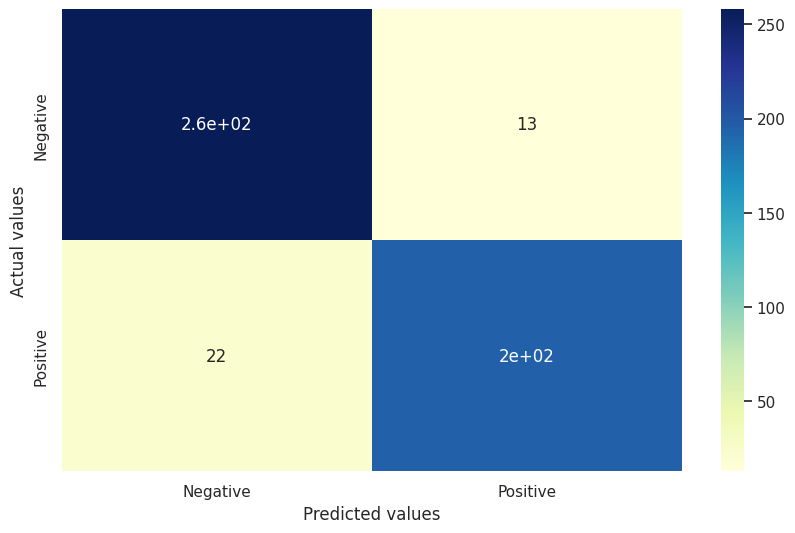

In [ ]:
cm = confusion_matrix(y_test, y_pred4)

plt.figure(figsize = (10,6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [ ]:
scores = cross_val_score(best_rf_model, x_train_tfidf,y_train, cv=10)
print(accuracy_score(y_test,y_pred4))
print ("Cross-validated scores:", scores)

0.9282786885245902
Cross-validated scores: [0.92307692 0.9025641  0.91282051 0.94871795 0.90769231 0.94358974
 0.88205128 0.93333333 0.93814433 0.93298969]


##GradientBoostingClassifier Model with Hyperparameter Tuning and Evaluation

In [ ]:
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
}

gbc = GradientBoostingClassifier(random_state=1, verbose=1)

grid_search = GridSearchCV(gbc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train_tfidf, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_gbc_model = grid_search.best_estimator_

y_pred5 = best_gbc_model.predict(x_test_tfidf)

accuracy = accuracy_score(y_test, y_pred5)
classification_rep = classification_report(y_test, y_pred5)

print(f"Accuracy : {accuracy:.2f}%")
print("Classification Report:")
print(classification_rep)

      Iter       Train Loss   Remaining Time 
         1           1.2835           10.66s
         2           1.2138           10.31s
         3           1.1522           10.34s
         4           1.1008           10.44s
         5           1.0573           10.50s
         6           1.0188           10.80s
         7           0.9856           10.79s
         8           0.9565           10.75s
         9           0.9333           10.66s
        10           0.9087           10.77s
        20           0.7538           10.04s
        30           0.6650            9.55s
        40           0.5947           10.18s
        50           0.5454           10.44s
        60           0.5031           10.45s
        70           0.4685           10.49s
        80           0.4386           10.34s
        90           0.4149           10.16s
       100           0.3926            9.95s
       200           0.2542            7.10s
       300           0.1827            4.62s
       40

In [ ]:
cm = confusion_matrix(y_test, y_pred5)

plt.figure(figsize = (10,6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [ ]:
scores = cross_val_score(best_gbc_model, x_train_tfidf,y_train, cv=10)
print(accuracy_score(y_test,y_pred5))
print ("Cross-validated scores:", scores)

      Iter       Train Loss   Remaining Time 
         1           1.2827           33.66s
         2           1.2097           32.60s
         3           1.1490           32.42s
         4           1.0970           31.99s
         5           1.0502           31.83s
         6           1.0107           30.53s
         7           0.9772           28.52s
         8           0.9480           27.17s
         9           0.9201           26.16s
        10           0.8933           25.21s
        20           0.7412           20.26s
        30           0.6467           18.43s
        40           0.5821           17.25s
        50           0.5338           16.43s
        60           0.4938           15.82s
        70           0.4569           15.27s
        80           0.4283           14.66s
        90           0.4058           14.12s
       100           0.3821           13.67s
       200           0.2466            9.68s
       300           0.1753            6.34s
       40

##Voting Classifier Model with Hyperparameter Tuning and Evaluation

In [ ]:
mnb = MultinomialNB()
rfc = RandomForestClassifier(random_state=42)
lr = LogisticRegression(n_jobs=-1)
svc = SVC(probability=True)

ec = VotingClassifier(estimators=[
    ('Multinomial NB', mnb),
    ('Random Forest', rfc),
    ('Logistic Regression', lr),
    ('Support Vector Machine', svc)
], voting='soft')

param_grid = {
    'Multinomial NB__alpha': [0.1, 1.0, 10.0],
    'Random Forest__n_estimators': [100, 300, 500],
    'Logistic Regression__C': [0.1, 1.0, 10.0],
    'Support Vector Machine__C': [0.1, 1.0, 10.0],
}

grid_search = GridSearchCV(ec, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train_tfidf, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_ec_model = grid_search.best_estimator_
y_pred6 = best_ec_model.predict(x_test_tfidf)

accuracy = accuracy_score(y_test, y_pred6)
classification_rep = classification_report(y_test, y_pred6)

print(f"Accuracy : {accuracy:.2f}%")
print("Classification Report:")
print(classification_rep)

Best Hyperparameters: {'Logistic Regression__C': 1.0, 'Multinomial NB__alpha': 0.1, 'Random Forest__n_estimators': 300, 'Support Vector Machine__C': 10.0}
Accuracy : 0.95%
Classification Report:
                        precision    recall  f1-score   support

      Not Suicide post       0.95      0.96      0.95       271
Potential Suicide post       0.94      0.94      0.94       217

              accuracy                           0.95       488
             macro avg       0.95      0.95      0.95       488
          weighted avg       0.95      0.95      0.95       488



Text(91.25, 0.5, 'Actual values')

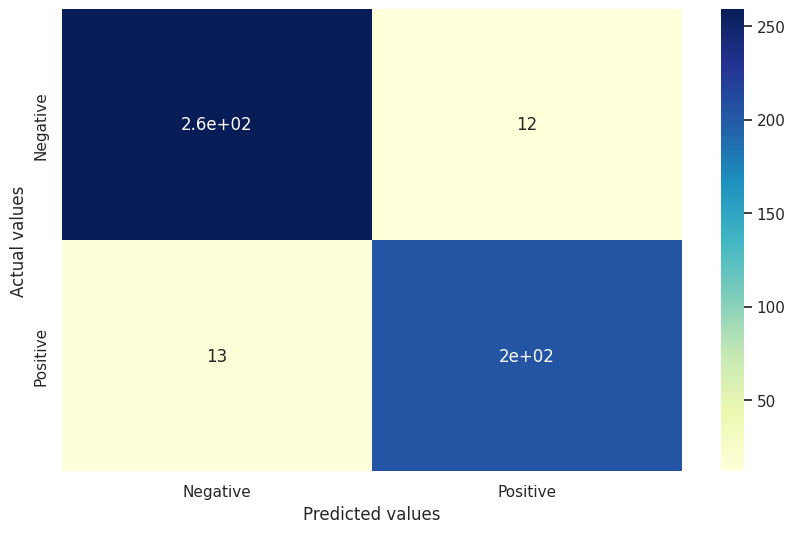

In [ ]:
cm = confusion_matrix(y_test, y_pred6)

plt.figure(figsize = (10,6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [ ]:
scores = cross_val_score(best_ec_model, x_train_tfidf,y_train, cv=10)
print(accuracy_score(y_test,y_pred6))
print ("Cross-validated scores:", scores)

0.9487704918032787
Cross-validated scores: [0.93846154 0.88717949 0.92820513 0.94871795 0.92820513 0.95897436
 0.8974359  0.93333333 0.92268041 0.93814433]


In [ ]:
mc = count_vect.transform(["suicide is good"])
m = transformer.transform(mc)
y_pred = ec.predict(m)
print(y_pred)

['Potential Suicide post']


In [ ]:
joblib.dump(ec, 'Suicide_Ensemble.pkl')
#model = joblib.load('Suicide_Ensemble.pkl')

['Suicide_Ensemble.pkl']

##AdaBoost Model with Hyperparameter Tuning and Evaluation

In [ ]:
base_estimator = RandomForestClassifier(random_state=0)

abc = AdaBoostClassifier(base_estimator=base_estimator)

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.2, 0.3],
}

grid_search = GridSearchCV(abc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train_tfidf, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_abc_model = grid_search.best_estimator_
y_pred7 = best_abc_model.predict(x_test_tfidf)

accuracy = accuracy_score(y_test, y_pred7)
classification_rep = classification_report(y_test, y_pred7)

print(f"Accuracy : {accuracy:.2f}%")
print("Classification Report:")
print(classification_rep)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Hyperparameters: {'learning_rate': 0.1, 'n_estimators': 50}
Accuracy : 0.92%
Classification Report:
                        precision    recall  f1-score   support

      Not Suicide post       0.93      0.93      0.93       271
Potential Suicide post       0.91      0.92      0.91       217

              accuracy                           0.92       488
             macro avg       0.92      0.92      0.92       488
          weighted avg       0.92      0.92      0.92       488



Text(91.25, 0.5, 'Actual values')

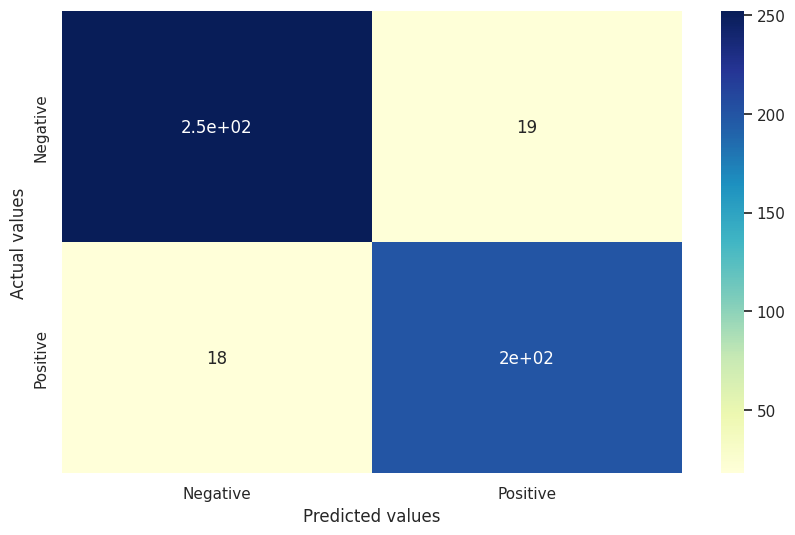

In [ ]:
cm = confusion_matrix(y_test, y_pred7)

plt.figure(figsize = (10,6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [ ]:
scores = cross_val_score(best_abc_model, x_train_tfidf,y_train, cv=10)
print(accuracy_score(y_test,y_pred7))
print ("Cross-validated scores:", scores)

0.9241803278688525
Cross-validated scores: [0.94358974 0.89230769 0.91794872 0.95384615 0.91794872 0.93846154
 0.8974359  0.93846154 0.93298969 0.93814433]


##Comparison Between ML Models

In [ ]:
Comparison_unibi = pd.DataFrame({'Logistic Regression': [accuracy_score(y_test,y_pred1)*100,f1_score(y_test,y_pred1,average='macro')*100,recall_score(y_test, y_pred1,average='micro')*100,precision_score(y_test, y_pred1,average='micro')*100],
                            'SVM':[accuracy_score(y_test,y_pred2)*100,f1_score(y_test,y_pred2,average='macro')*100,recall_score(y_test, y_pred2,average='micro')*100,precision_score(y_test, y_pred2,average='micro')*100],
                           'Naive Bayes':[accuracy_score(y_test,y_pred3)*100,f1_score(y_test,y_pred3,average='macro')*100,recall_score(y_test, y_pred3,average='micro')*100,precision_score(y_test, y_pred3,average='micro')*100],
                           'Random Forest':[accuracy_score(y_test,y_pred4)*100,f1_score(y_test,y_pred4,average='macro')*100,recall_score(y_test, y_pred4,average='micro')*100,precision_score(y_test, y_pred4,average='micro')*100],
                           'GradientBoosting':[accuracy_score(y_test,y_pred5)*100,f1_score(y_test,y_pred5,average='macro')*100,recall_score(y_test, y_pred5,average='micro')*100,precision_score(y_test, y_pred5,average='micro')*100],
                           'Ensembled':[accuracy_score(y_test,y_pred6)*100,f1_score(y_test,y_pred6,average='macro')*100,recall_score(y_test, y_pred6,average='micro')*100,precision_score(y_test, y_pred6,average='micro')*100],
                           'Adaboost':[accuracy_score(y_test,y_pred7)*100,f1_score(y_test,y_pred7,average='macro')*100,recall_score(y_test, y_pred7,average='micro')*100,precision_score(y_test, y_pred7,average='micro')*100],

})

In [ ]:
print ('Comparison using uni-bi-gram(1,2)')
Comparison_unibi.rename(index={0:'Accuracy',1:'F1_score', 2: 'Recall',3:'Precision'}, inplace=True)
Comparison_unibi.head()

Comparison using uni-bi-gram(1,2)


,Logistic Regression,SVM,Naive Bayes,Random Forest,GradientBoosting,Ensembled,Adaboost
Accuracy,93.852459,92.827869,93.237705,92.827869,89.959016,94.877049,92.418033
F1_score,93.770425,92.760718,93.163032,92.706309,89.810068,94.811138,92.327533
Recall,93.852459,92.827869,93.237705,92.827869,89.959016,94.877049,92.418033
Precision,93.852459,92.827869,93.237705,92.827869,89.959016,94.877049,92.418033


# **Deep Learning Models**

##Tokenization and Data Preparation for Deep Learning

In [ ]:
label_encoder = LabelEncoder()
df['Suicide'] = label_encoder.fit_transform(df['Suicide'])

In [ ]:
X = df['Tweet']
y = df['Suicide']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

6862


In [ ]:
# Save the tokenizer object
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
max_length = 60
X_train = pad_sequences(X_train, maxlen=max_length)
X_test = pad_sequences(X_test, maxlen=max_length)

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

##LSTM Model Training and Evaluation

In [ ]:
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length))
model_lstm.add(SpatialDropout1D(0.2))
model_lstm.add(LSTM(128, return_sequences=True, dropout=0.3, recurrent_dropout=0.3))
model_lstm.add(LSTM(64, return_sequences=True, dropout=0.3, recurrent_dropout=0.3))
model_lstm.add(LSTM(32, return_sequences=True))
model_lstm.add(LSTM(16, return_sequences=True))
model_lstm.add(Dropout(0.3))
model_lstm.add(Flatten())
model_lstm.add(Dense(128, activation='relu'))
model_lstm.add(Dropout(0.3))
model_lstm.add(Dense(len(label_encoder.classes_), activation='softmax'))

model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, 60, 128)           878336    
                                                                 
 spatial_dropout1d_14 (Spat  (None, 60, 128)           0         
 ialDropout1D)                                                   
                                                                 
 lstm_51 (LSTM)              (None, 60, 128)           131584    
                                                                 
 lstm_52 (LSTM)              (None, 60, 64)            49408     
                                                                 
 lstm_53 (LSTM)              (None, 60, 32)            12416     
                                                                 
 lstm_54 (LSTM)              (None, 60, 16)            3136      
                                                     

In [ ]:
checkpoint_callback = ModelCheckpoint(filepath="lstm_best_model.h5", save_best_only=True, monitor="val_acc", mode="max", verbose=1)
early_stopping_callback = EarlyStopping(monitor="val_acc", mode="max", patience=10, verbose=1, restore_best_weights=True)
reduce_lr_callback = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5, verbose=1, mode="min", min_delta=0.0001, cooldown=0, min_lr=0)
callbacks=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]

history_lstm = model_lstm.fit(X_train, y_train, epochs = 5, batch_size = 16, validation_data=(X_test,y_test), callbacks=callbacks)

Epoch 1/5
122/122 [==============================] - 97s 703ms/step - loss: 0.6635 - accuracy: 0.6078 - val_loss: 0.5756 - val_accuracy: 0.7090 - lr: 0.0010
Epoch 2/5
122/122 [==============================] - 75s 613ms/step - loss: 0.3839 - accuracy: 0.8306 - val_loss: 0.2736 - val_accuracy: 0.8852 - lr: 0.0010
Epoch 3/5
122/122 [==============================] - 71s 586ms/step - loss: 0.1628 - accuracy: 0.9379 - val_loss: 0.2782 - val_accuracy: 0.9098 - lr: 0.0010
Epoch 4/5
122/122 [==============================] - 70s 572ms/step - loss: 0.0795 - accuracy: 0.9723 - val_loss: 0.2641 - val_accuracy: 0.9180 - lr: 0.0010
Epoch 5/5
122/122 [==============================] - 69s 567ms/step - loss: 0.0430 - accuracy: 0.9867 - val_loss: 0.2391 - val_accuracy: 0.9344 - lr: 0.0010


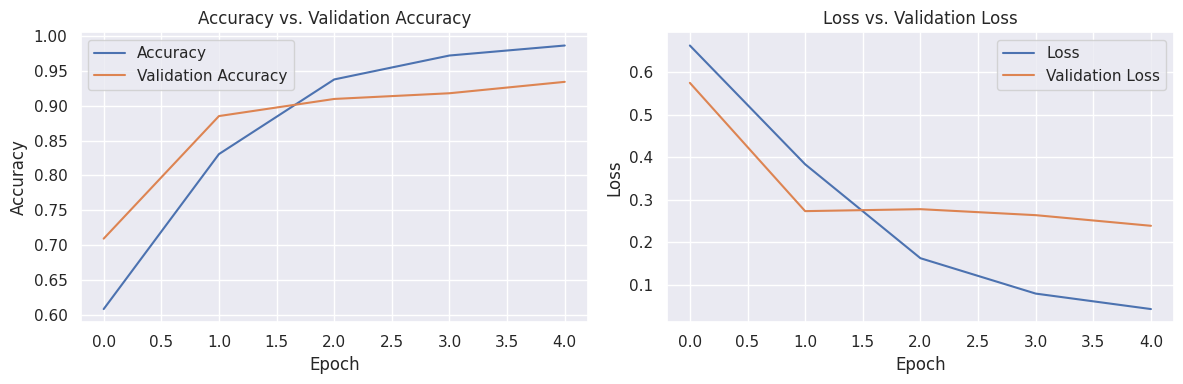

In [ ]:
accuracy = history_lstm.history['accuracy']
val_accuracy = history_lstm.history['val_accuracy']
loss = history_lstm.history['loss']
val_loss = history_lstm.history['val_loss']

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs. Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs. Validation Loss')

plt.tight_layout()
plt.show()

In [ ]:
hist_=pd.DataFrame(history_lstm.history)
hist_

,loss,accuracy,val_loss,val_accuracy,lr
0,0.663530,0.607803,0.575627,0.709016,0.001
1,0.383915,0.830595,0.273606,0.885246,0.001
2,0.162797,0.937885,0.278222,0.909836,0.001
3,0.079482,0.972279,0.264123,0.918033,0.001
4,0.043026,0.986653,0.239093,0.934426,0.001


In [ ]:
loss, accuracy = model_lstm.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")

16/16 [==============================] - 1s 46ms/step - loss: 0.2391 - accuracy: 0.9344
Test Loss: 0.2391
Test Accuracy: 93.44%


In [ ]:
class_names = label_encoder.classes_


y_test_original = np.argmax(y_test, axis=1)
y_pred = np.argmax(model_lstm.predict(X_test), axis=1)

report = classification_report(y_test_original, y_pred, target_names=class_names)
print('Classification Report:\n', report)

16/16 [==============================] - 2s 59ms/step
Classification Report:
                         precision    recall  f1-score   support

      Not Suicide post       0.95      0.93      0.94       271
Potential Suicide post       0.92      0.94      0.93       217

              accuracy                           0.93       488
             macro avg       0.93      0.93      0.93       488
          weighted avg       0.93      0.93      0.93       488



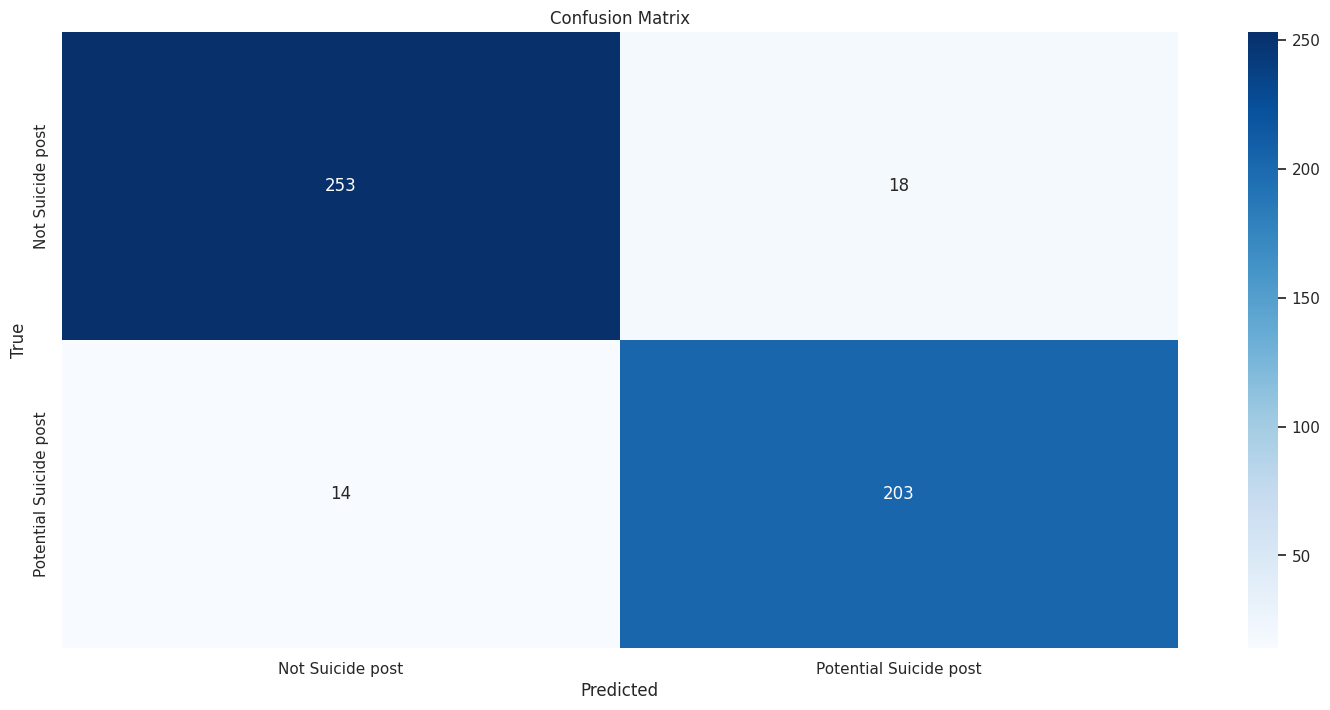

In [ ]:
conf_matrix = confusion_matrix(y_test_original, y_pred)

plt.figure(figsize=(18, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
def predict_text(texts, model, tokenizer, max_length, label_encoder):
    predictions = []

    for text in texts:
        sequences = tokenizer.texts_to_sequences([text])
        padded_sequences = pad_sequences(sequences, maxlen=max_length)

        probabilities = model.predict(padded_sequences)[0]
        predicted_text = label_encoder.inverse_transform([probabilities.argmax()])[0]
        predictions.append((predicted_text, probabilities.max()))

    return predictions

texts = [
    "I do not want to die.",
    "I want to die right now, i don't want to live in this world.",
    "She want to die.",
    "i will not kill myself."
]

predicted_texts = predict_text( texts, model_lstm, tokenizer, max_length, label_encoder)

for text, (predicted_text, probability) in zip(texts, predicted_texts):
    print(f"Text: '{text}'")
    print(f"Predicted: {predicted_text}")
    print(f"Probability of {predicted_text}: {probability:.4f}\n")


1/1 [==============================] - 0s 82ms/step
Text: 'I do not want to die.'
Predicted: Not Suicide post
Probability of Not Suicide post: 0.9882

Text: 'I want to die right now, i don't want to live in this world.'
Predicted: Potential Suicide post
Probability of Potential Suicide post: 0.9979

Text: 'She want to die.'
Predicted: Not Suicide post
Probability of Not Suicide post: 0.9844

Text: 'i will not kill myself.'
Predicted: Not Suicide post
Probability of Not Suicide post: 0.9087



##GRU Model Training and Evaluation

In [ ]:
model_gru = Sequential()
model_gru.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length))
model_gru.add(GRU(128, return_sequences=True, dropout=0.3, recurrent_dropout=0.3))
model_gru.add(GRU(64, return_sequences=True, dropout=0.3, recurrent_dropout=0.3))
model_gru.add(GRU(32, return_sequences=True))
model_gru.add(GRU(16, return_sequences=True))
model_gru.add(Dropout(0.3))
model_gru.add(Flatten())
model_gru.add(Dense(128, activation='relu'))
model_gru.add(Dropout(0.3))
model_gru.add(Dense(len(label_encoder.classes_), activation='softmax'))

model_gru.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_gru.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_19 (Embedding)    (None, 60, 128)           878336    
                                                                 
 gru_12 (GRU)                (None, 60, 128)           99072     
                                                                 
 gru_13 (GRU)                (None, 60, 64)            37248     
                                                                 
 gru_14 (GRU)                (None, 60, 32)            9408      
                                                                 
 gru_15 (GRU)                (None, 60, 16)            2400      
                                                                 
 dropout_35 (Dropout)        (None, 60, 16)            0         
                                                                 
 flatten_16 (Flatten)        (None, 960)             

In [ ]:
checkpoint_callback = ModelCheckpoint(filepath="gru-best_model.h5", save_best_only=True, monitor="val_acc", mode="max", verbose=1)
early_stopping_callback = EarlyStopping(monitor="val_acc", mode="max", patience=10, verbose=1, restore_best_weights=True)
reduce_lr_callback = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5, verbose=1, mode="min", min_delta=0.0001, cooldown=0, min_lr=0)

callbacks2=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]

history_gru = model_gru.fit(X_train, y_train, epochs=5, batch_size=15,validation_data=(X_test,y_test), callbacks=callbacks2)

Epoch 1/5
130/130 [==============================] - 95s 606ms/step - loss: 0.5620 - accuracy: 0.6853 - val_loss: 0.3461 - val_accuracy: 0.8361 - lr: 0.0010
Epoch 2/5
130/130 [==============================] - 68s 522ms/step - loss: 0.2098 - accuracy: 0.9168 - val_loss: 0.2431 - val_accuracy: 0.9160 - lr: 0.0010
Epoch 3/5
130/130 [==============================] - 67s 513ms/step - loss: 0.0750 - accuracy: 0.9718 - val_loss: 0.2688 - val_accuracy: 0.8996 - lr: 0.0010
Epoch 4/5
130/130 [==============================] - 72s 556ms/step - loss: 0.0492 - accuracy: 0.9825 - val_loss: 0.3170 - val_accuracy: 0.9324 - lr: 0.0010
Epoch 5/5
130/130 [==============================] - 66s 508ms/step - loss: 0.0344 - accuracy: 0.9897 - val_loss: 0.2610 - val_accuracy: 0.9221 - lr: 0.0010


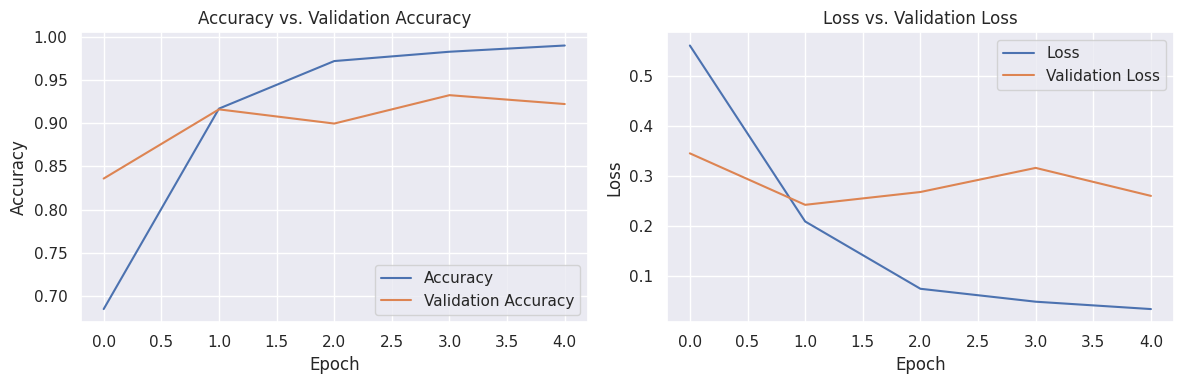

In [ ]:
accuracy = history_gru.history['accuracy']
val_accuracy = history_gru.history['val_accuracy']
loss = history_gru.history['loss']
val_loss = history_gru.history['val_loss']

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs. Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs. Validation Loss')

plt.tight_layout()
plt.show()

In [ ]:
hist_=pd.DataFrame(history_gru.history)
hist_

,loss,accuracy,val_loss,val_accuracy,lr
0,0.561990,0.685318,0.346138,0.836066,0.001
1,0.209793,0.916838,0.243094,0.915984,0.001
2,0.075034,0.971766,0.268760,0.899590,0.001
3,0.049159,0.982546,0.316999,0.932377,0.001
4,0.034406,0.989733,0.260956,0.922131,0.001


In [ ]:
loss, accuracy = model_gru.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")

16/16 [==============================] - 2s 111ms/step - loss: 0.2610 - accuracy: 0.9221
Test Loss: 0.2610
Test Accuracy: 92.21%


In [ ]:
class_names = label_encoder.classes_


y_test_original = np.argmax(y_test, axis=1)
y_pred = np.argmax(model_gru.predict(X_test), axis=1)

report = classification_report(y_test_original, y_pred, target_names=class_names)
print('Classification Report:\n', report)

16/16 [==============================] - 6s 151ms/step
Classification Report:
                         precision    recall  f1-score   support

      Not Suicide post       0.93      0.93      0.93       271
Potential Suicide post       0.91      0.92      0.91       217

              accuracy                           0.92       488
             macro avg       0.92      0.92      0.92       488
          weighted avg       0.92      0.92      0.92       488



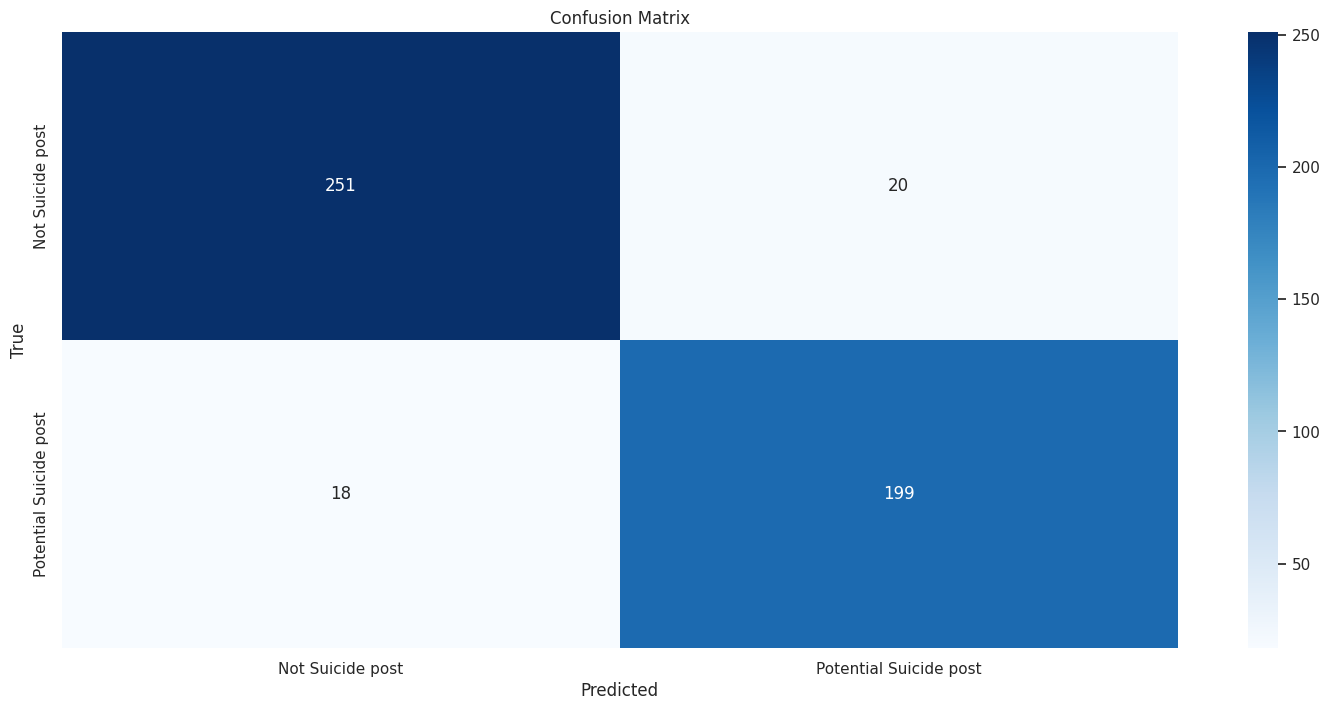

In [ ]:
conf_matrix = confusion_matrix(y_test_original, y_pred)

plt.figure(figsize=(18, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
def predict_text(texts, model, tokenizer, max_length, label_encoder):
    predictions = []

    for text in texts:
        sequences = tokenizer.texts_to_sequences([text])
        padded_sequences = pad_sequences(sequences, maxlen=max_length)

        probabilities = model.predict(padded_sequences)[0]
        predicted_text = label_encoder.inverse_transform([probabilities.argmax()])[0]
        predictions.append((predicted_text, probabilities.max()))

    return predictions

texts = [
    "I do not want to die.",
    "I want to die right now, i don't want to live in this world.",
    "She want to die.",
    "i will not kill myself."
]

predicted_texts = predict_text( texts, model_gru, tokenizer, max_length, label_encoder)

for text, (predicted_text, probability) in zip(texts, predicted_texts):
    print(f"Text: '{text}'")
    print(f"Predicted: {predicted_text}")
    print(f"Probability of {predicted_text}: {probability:.4f}\n")


1/1 [==============================] - 0s 77ms/step
Text: 'I do not want to die.'
Predicted: Not Suicide post
Probability of Not Suicide post: 0.9998

Text: 'I want to die right now, i don't want to live in this world.'
Predicted: Potential Suicide post
Probability of Potential Suicide post: 0.9999

Text: 'She want to die.'
Predicted: Not Suicide post
Probability of Not Suicide post: 0.9994

Text: 'i will not kill myself.'
Predicted: Not Suicide post
Probability of Not Suicide post: 0.9982



##CNN Model Training and Evaluation

In [ ]:
model_cnn = Sequential()
model_cnn.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length))
model_cnn.add(Conv1D(64, 2, activation='relu'))
model_cnn.add(MaxPooling1D(2))
model_cnn.add(Conv1D(128, 2, activation='relu'))
model_cnn.add(MaxPooling1D(2))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dropout(0.3))
model_cnn.add(Dense(len(label_encoder.classes_), activation='softmax'))

model_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_cnn.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_20 (Embedding)    (None, 60, 128)           878336    
                                                                 
 conv1d (Conv1D)             (None, 59, 64)            16448     
                                                                 
 max_pooling1d (MaxPooling1  (None, 29, 64)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 28, 128)           16512     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 14, 128)           0         
 g1D)                                                            
                                                                 
 flatten_17 (Flatten)        (None, 1792)            

In [ ]:
checkpoint_callback = ModelCheckpoint(filepath="cnn-best_model.h5", save_best_only=True, monitor="val_acc", mode="max", verbose=1)
early_stopping_callback = EarlyStopping(monitor="val_acc", mode="max", patience=10, verbose=1, restore_best_weights=True)
reduce_lr_callback = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5, verbose=1, mode="min", min_delta=0.0001, cooldown=0, min_lr=0)

callbacks3=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]

history_cnn= model_cnn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=16, callbacks=callbacks3)

Epoch 1/5
122/122 [==============================] - 22s 116ms/step - loss: 0.5316 - accuracy: 0.7248 - val_loss: 0.2755 - val_accuracy: 0.8914 - lr: 0.0010
Epoch 2/5
122/122 [==============================] - 5s 44ms/step - loss: 0.1920 - accuracy: 0.9281 - val_loss: 0.1669 - val_accuracy: 0.9406 - lr: 0.0010
Epoch 3/5
122/122 [==============================] - 3s 27ms/step - loss: 0.0527 - accuracy: 0.9841 - val_loss: 0.2489 - val_accuracy: 0.9262 - lr: 0.0010
Epoch 4/5
122/122 [==============================] - 2s 15ms/step - loss: 0.0217 - accuracy: 0.9923 - val_loss: 0.2902 - val_accuracy: 0.9242 - lr: 0.0010
Epoch 5/5
122/122 [==============================] - 1s 7ms/step - loss: 0.0091 - accuracy: 0.9974 - val_loss: 0.2853 - val_accuracy: 0.9242 - lr: 0.0010


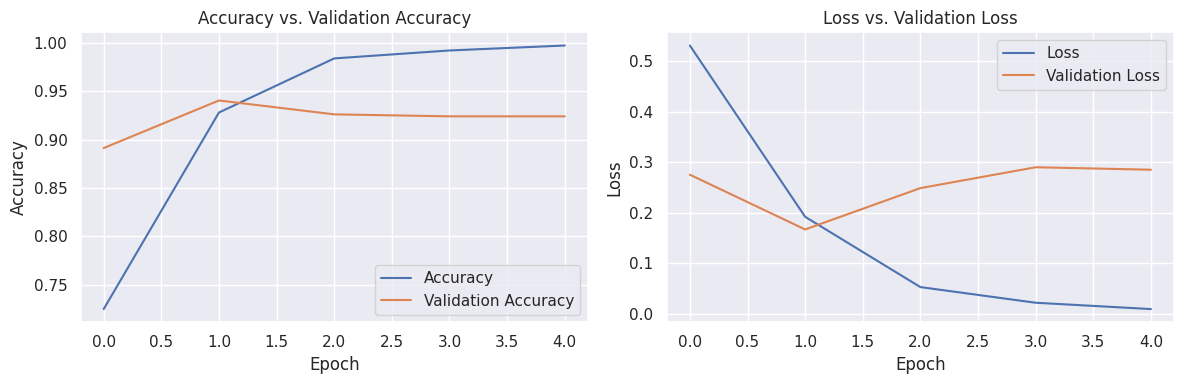

In [ ]:
accuracy = history_cnn.history['accuracy']
val_accuracy = history_cnn.history['val_accuracy']
loss = history_cnn.history['loss']
val_loss = history_cnn.history['val_loss']

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs. Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs. Validation Loss')

plt.tight_layout()
plt.show()

In [ ]:
hist_=pd.DataFrame(history_cnn.history)
hist_

,loss,accuracy,val_loss,val_accuracy,lr
0,0.531552,0.724846,0.275496,0.891393,0.001
1,0.192022,0.928131,0.166949,0.940574,0.001
2,0.052667,0.984086,0.248894,0.926230,0.001
3,0.021656,0.992300,0.290230,0.924180,0.001
4,0.009117,0.997433,0.285322,0.924180,0.001


In [ ]:
loss, accuracy = model_cnn.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")

16/16 [==============================] - 0s 6ms/step - loss: 0.2853 - accuracy: 0.9242
Test Loss: 0.2853
Test Accuracy: 92.42%


In [ ]:
class_names = label_encoder.classes_

y_test_original = np.argmax(y_test, axis=1)
y_pred = np.argmax(model_cnn.predict(X_test), axis=1)

report = classification_report(y_test_original, y_pred, target_names=class_names)
print('Classification Report:\n', report)

16/16 [==============================] - 0s 3ms/step
Classification Report:
                         precision    recall  f1-score   support

      Not Suicide post       0.94      0.92      0.93       271
Potential Suicide post       0.90      0.93      0.92       217

              accuracy                           0.92       488
             macro avg       0.92      0.92      0.92       488
          weighted avg       0.92      0.92      0.92       488



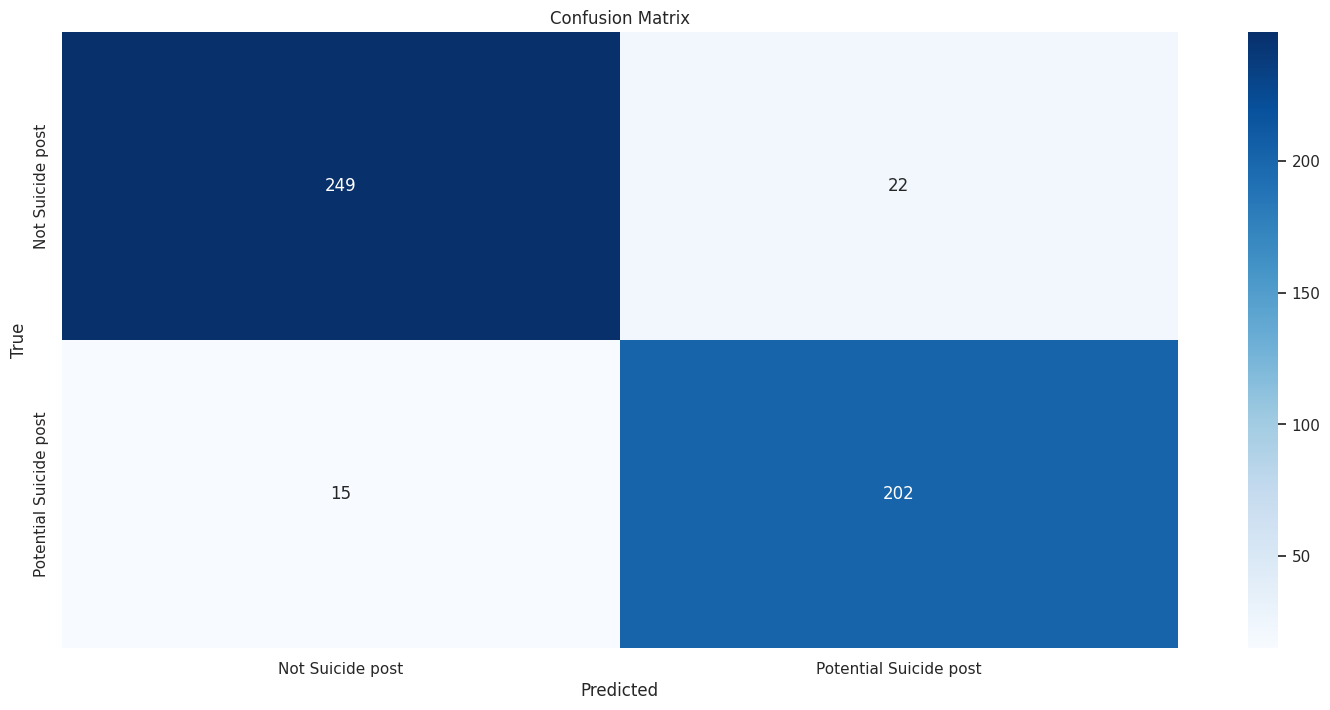

In [ ]:
conf_matrix = confusion_matrix(y_test_original, y_pred)

plt.figure(figsize=(18, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
def predict_text(texts, model, tokenizer, max_length, label_encoder):
    predictions = []

    for text in texts:
        sequences = tokenizer.texts_to_sequences([text])
        padded_sequences = pad_sequences(sequences, maxlen=max_length)

        probabilities = model.predict(padded_sequences)[0]
        predicted_text = label_encoder.inverse_transform([probabilities.argmax()])[0]
        predictions.append((predicted_text, probabilities.max()))

    return predictions

texts = [
    "I do not want to die.",
    "I want to die right now, i don't want to live in this world.",
    "She want to die.",
    "i will not kill myself."
]

predicted_texts = predict_text( texts, model_cnn, tokenizer, max_length, label_encoder)

for text, (predicted_text, probability) in zip(texts, predicted_texts):
    print(f"Text: '{text}'")
    print(f"Predicted: {predicted_text}")
    print(f"Probability of {predicted_text}: {probability:.4f}\n")


1/1 [==============================] - 0s 28ms/step
Text: 'I do not want to die.'
Predicted: Not Suicide post
Probability of Not Suicide post: 0.9924

Text: 'I want to die right now, i don't want to live in this world.'
Predicted: Potential Suicide post
Probability of Potential Suicide post: 0.9997

Text: 'She want to die.'
Predicted: Not Suicide post
Probability of Not Suicide post: 0.9997

Text: 'i will not kill myself.'
Predicted: Not Suicide post
Probability of Not Suicide post: 0.9999



##Hybrid Model Training and Evaluation

In [ ]:
model_hb = Sequential()
model_hb.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length))
model_hb.add(Conv1D(128, 2, activation='relu'))
model_hb.add(MaxPooling1D(2))
model_hb.add(LSTM(128, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))
model_hb.add(LSTM(64, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))
model_hb.add(LSTM(32, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))
model_hb.add(Flatten())
model_hb.add(Dense(128, activation='relu'))
model_hb.add(Dropout(0.3))
model_hb.add(Dense(len(label_encoder.classes_), activation='softmax'))

model_hb.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_hb.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 60, 128)           878336    
                                                                 
 conv1d_4 (Conv1D)           (None, 59, 128)           32896     
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 29, 128)           0         
 g1D)                                                            
                                                                 
 lstm_12 (LSTM)              (None, 29, 128)           131584    
                                                                 
 lstm_13 (LSTM)              (None, 29, 64)            49408     
                                                                 
 lstm_14 (LSTM)              (None, 29, 32)            12416     
                                                      

In [ ]:
checkpoint_callback = ModelCheckpoint(filepath="hb-best_model.h5", save_best_only=True, monitor="val_acc", mode="max", verbose=1)
early_stopping_callback = EarlyStopping(monitor="val_acc", mode="max", patience=10, verbose=1, restore_best_weights=True)
reduce_lr_callback = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5, verbose=1, mode="min", min_delta=0.0001, cooldown=0, min_lr=0)

callbacks4=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]

history_hb= model_hb.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=15, callbacks=callbacks4 )

Epoch 1/5
130/130 [==============================] - 36s 199ms/step - loss: 0.6154 - accuracy: 0.6489 - val_loss: 0.4303 - val_accuracy: 0.8238 - lr: 0.0010
Epoch 2/5
130/130 [==============================] - 24s 184ms/step - loss: 0.2785 - accuracy: 0.8891 - val_loss: 0.2935 - val_accuracy: 0.9057 - lr: 0.0010
Epoch 3/5
130/130 [==============================] - 24s 183ms/step - loss: 0.0970 - accuracy: 0.9651 - val_loss: 0.2881 - val_accuracy: 0.8852 - lr: 0.0010
Epoch 4/5
130/130 [==============================] - 25s 195ms/step - loss: 0.0540 - accuracy: 0.9810 - val_loss: 0.3203 - val_accuracy: 0.9119 - lr: 0.0010
Epoch 5/5
130/130 [==============================] - 23s 176ms/step - loss: 0.0262 - accuracy: 0.9918 - val_loss: 0.3694 - val_accuracy: 0.9119 - lr: 0.0010


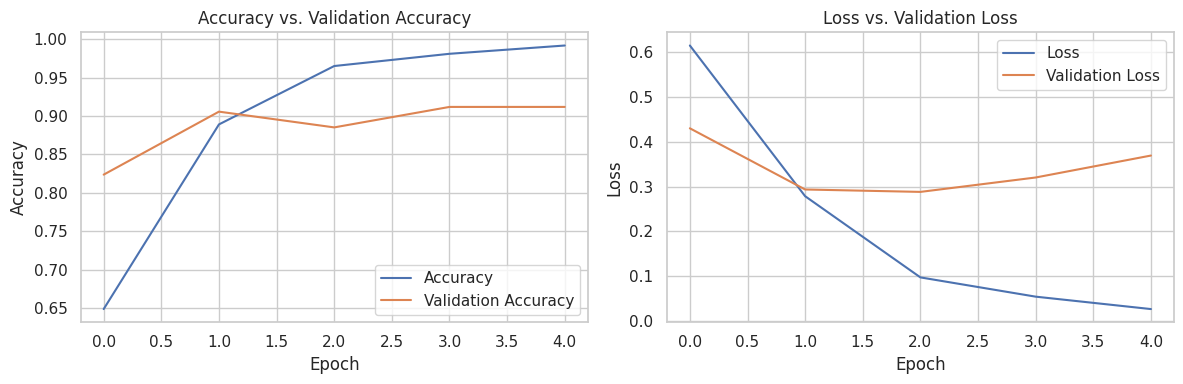

In [ ]:
accuracy = history_hb.history['accuracy']
val_accuracy = history_hb.history['val_accuracy']
loss = history_hb.history['loss']
val_loss = history_hb.history['val_loss']

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs. Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs. Validation Loss')

plt.tight_layout()
plt.show()

In [ ]:
hist_=pd.DataFrame(history_hb.history)
hist_

,loss,accuracy,val_loss,val_accuracy,lr
0,0.615378,0.648871,0.430309,0.823770,0.001
1,0.278516,0.889117,0.293530,0.905738,0.001
2,0.097018,0.965092,0.288148,0.885246,0.001
3,0.053955,0.981006,0.320340,0.911885,0.001
4,0.026203,0.991786,0.369398,0.911885,0.001


In [ ]:
loss, accuracy = model_hb.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")

16/16 [==============================] - 0s 27ms/step - loss: 0.3694 - accuracy: 0.9119
Test Loss: 0.3694
Test Accuracy: 91.19%


In [ ]:
class_names = label_encoder.classes_

y_test_original = np.argmax(y_test, axis=1)
y_pred = np.argmax(model_hb.predict(X_test), axis=1)

report = classification_report(y_test_original, y_pred, target_names=class_names)
print('Classification Report:\n', report)

16/16 [==============================] - 1s 27ms/step
Classification Report:
                         precision    recall  f1-score   support

      Not Suicide post       0.94      0.90      0.92       271
Potential Suicide post       0.88      0.93      0.90       217

              accuracy                           0.91       488
             macro avg       0.91      0.91      0.91       488
          weighted avg       0.91      0.91      0.91       488



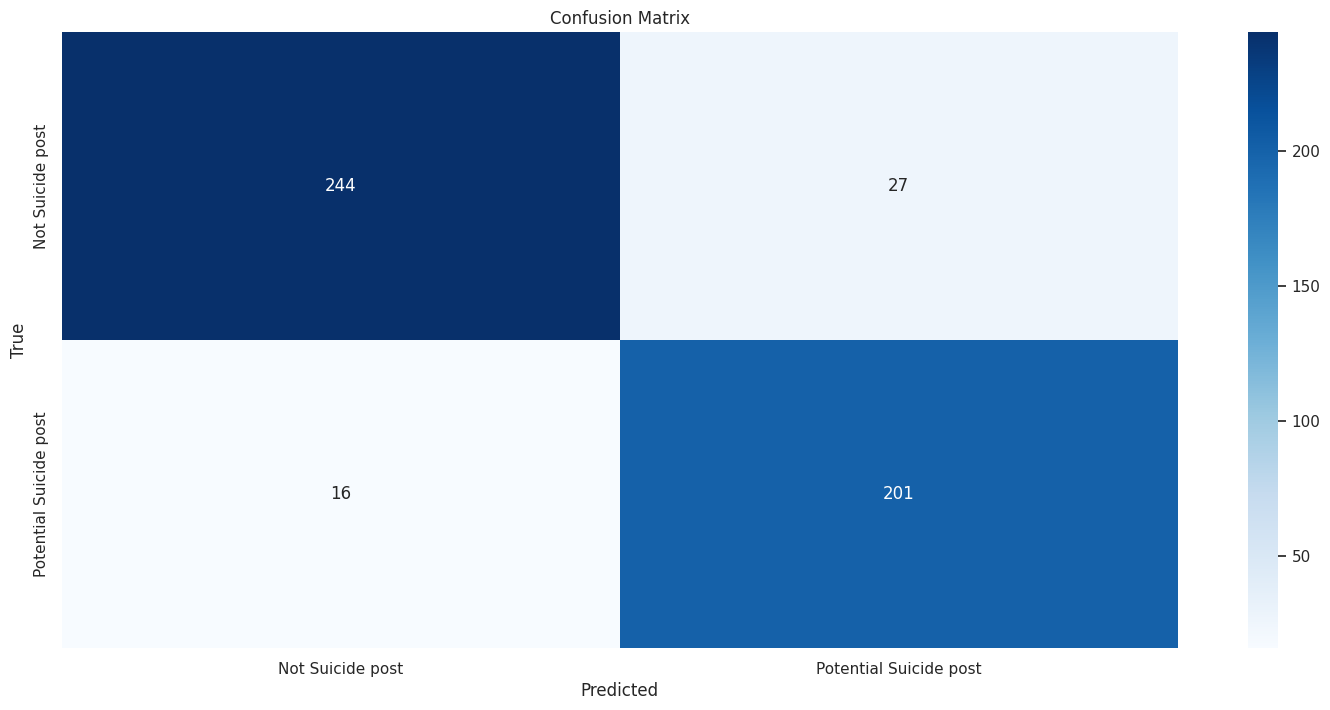

In [ ]:
conf_matrix = confusion_matrix(y_test_original, y_pred)

plt.figure(figsize=(18, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
def predict_text(texts, model, tokenizer, max_length, label_encoder):
    predictions = []

    for text in texts:
        sequences = tokenizer.texts_to_sequences([text])
        padded_sequences = pad_sequences(sequences, maxlen=max_length)

        probabilities = model.predict(padded_sequences)[0]
        predicted_text = label_encoder.inverse_transform([probabilities.argmax()])[0]
        predictions.append((predicted_text, probabilities.max()))

    return predictions

texts = [
    "I do not want to die.",
    "I want to die right now, i don't want to live in this world.",
    "She want to die.",
    "i will not kill myself."
]

predicted_texts = predict_text( texts, model_hb, tokenizer, max_length, label_encoder)

for text, (predicted_text, probability) in zip(texts, predicted_texts):
    print(f"Text: '{text}'")
    print(f"Predicted: {predicted_text}")
    print(f"Probability of {predicted_text}: {probability:.4f}\n")


1/1 [==============================] - 0s 48ms/step
Text: 'I do not want to die.'
Predicted: Not Suicide post
Probability of Not Suicide post: 0.9987

Text: 'I want to die right now, i don't want to live in this world.'
Predicted: Potential Suicide post
Probability of Potential Suicide post: 0.8616

Text: 'She want to die.'
Predicted: Not Suicide post
Probability of Not Suicide post: 0.9985

Text: 'i will not kill myself.'
Predicted: Not Suicide post
Probability of Not Suicide post: 0.9930



##Bert Model for Suicide Tweet Detection

###Data Preprocessing and Splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['Tweet'], df['Suicide'], test_size=0.20, random_state=42)

X_train = X_train.tolist()
X_test = X_test.tolist()
y_train = y_train.tolist()
y_test = y_test.tolist()

class_names = ['Potential Suicide post', 'Not Suicide post']

###Fine-Tuning BERT for Twitter Suicide Detection

In [ ]:
(x_train,y_train), (x_val,y_val), preproc = text.texts_from_array(x_train=X_train, y_train=y_train,
                                                                       x_test=X_test, y_test=y_test,
                                                                       class_names=class_names,
                                                                       preprocess_mode='bert',
                                                                       maxlen=140,
                                                                       max_features=5000)

downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


/usr/local/lib/python3.10/dist-packages/ktrain/utils.py:744: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  warnings.warn(


task: text classification


In [ ]:
model = text.text_classifier('bert', train_data=(x_train,y_train), preproc=preproc)

Is Multi-Label? False
maxlen is 140


/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


done.


In [ ]:
learner = ktrain.get_learner(model, train_data=(x_train,y_train),
                             val_data=(x_val,y_val),
                             batch_size=16)

In [ ]:
learner.fit_onecycle(2e-5, 3)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/3
115/115 [==============================] - 97s 564ms/step - loss: 0.4272 - accuracy: 0.8013 - val_loss: 0.1595 - val_accuracy: 0.9491
Epoch 2/3
115/115 [==============================] - 67s 582ms/step - loss: 0.1386 - accuracy: 0.9502 - val_loss: 0.0831 - val_accuracy: 0.9754
Epoch 3/3
115/115 [==============================] - 68s 594ms/step - loss: 0.0410 - accuracy: 0.9923 - val_loss: 0.0667 - val_accuracy: 0.9754


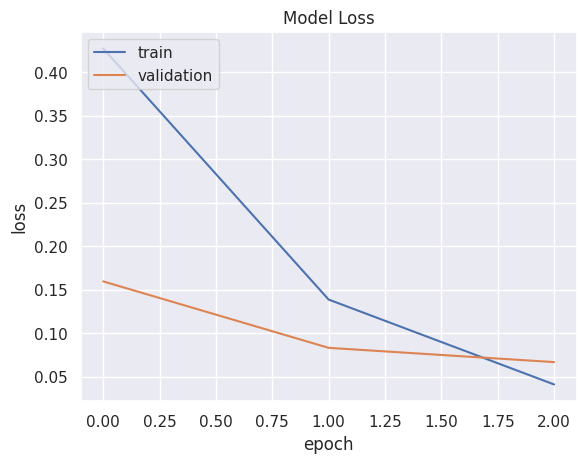

In [ ]:
learner.plot()

In [ ]:
learner.validate(val_data=(x_val,y_val), class_names=class_names)

20/20 [==============================] - 11s 311ms/step
                        precision    recall  f1-score   support

Potential Suicide post       0.98      0.98      0.98       334
      Not Suicide post       0.97      0.97      0.97       275

              accuracy                           0.98       609
             macro avg       0.97      0.98      0.98       609
          weighted avg       0.98      0.98      0.98       609



array([[326,   8],
       [  7, 268]])

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc)
predictor.get_classes()

['Not Suicide post', 'Potential Suicide post']

In [ ]:
message = 'i will not kill myself'
prediction = predictor.predict(message)
print('predicted: {}'.format(prediction))

predicted: Not Suicide post


**Save Bert Model**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
predictor.save("/content/drive/MyDrive/Colab_Notebooks/DL Model/Twitter Suicide Ideation Detection/bert_model_Suicide")

##XLNet for Suicide Tweet Detection

###Fine-Tuning XLNet for Twitter Suicide Detection

In [ ]:
model_name = 'xlnet-base-cased'
trans = text.Transformer(model_name, maxlen = 160, classes = ['Potential Suicide post', 'Not Suicide post'])

/usr/local/lib/python3.10/dist-packages/ktrain/text/preprocessor.py:382: UserWarning: The class_names argument is replacing the classes argument. Please update your code.
  warnings.warn(


In [ ]:
train_data = trans.preprocess_train(X_train, y_train)
test_data = trans.preprocess_test(X_test, y_test)

preprocessing train...
language: en
train sequence lengths:
	mean : 17
	95percentile : 29
	99percentile : 126


/usr/local/lib/python3.10/dist-packages/ktrain/utils.py:744: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  warnings.warn(


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 17
	95percentile : 30
	99percentile : 115


In [ ]:
model = trans.get_classifier()

/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer TruncatedNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [ ]:
learner = ktrain.get_learner(model, train_data=train_data, val_data=test_data, batch_size=6)

In [ ]:
learner.fit_onecycle(lr=2e-5, epochs=5)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/5
305/305 [==============================] - 137s 333ms/step - loss: 0.3958 - accuracy: 0.8166 - val_loss: 0.2570 - val_accuracy: 0.8998
Epoch 2/5
305/305 [==============================] - 98s 321ms/step - loss: 0.1891 - accuracy: 0.9349 - val_loss: 0.1741 - val_accuracy: 0.9392
Epoch 3/5
305/305 [==============================] - 99s 324ms/step - loss: 0.1116 - accuracy: 0.9568 - val_loss: 0.1485 - val_accuracy: 0.9557
Epoch 4/5
305/305 [==============================] - 98s 321ms/step - loss: 0.0451 - accuracy: 0.9852 - val_loss: 0.1133 - val_accuracy: 0.9622
Epoch 5/5
305/305 [==============================] - 98s 321ms/step - loss: 0.0149 - accuracy: 0.9973 - val_loss: 0.1148 - val_accuracy: 0.9655


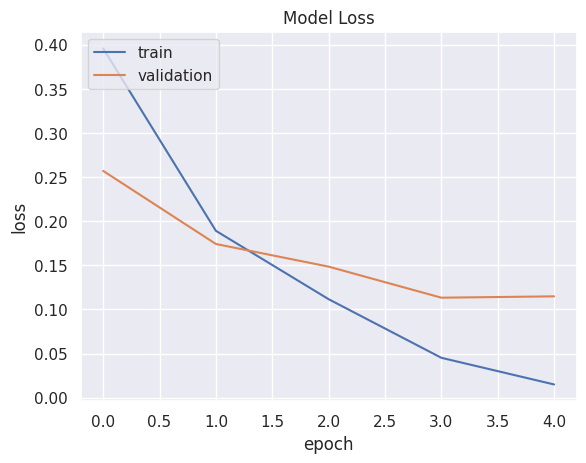

In [ ]:
learner.plot()

In [ ]:
learner.validate(val_data=test_data, class_names=trans.get_classes())

20/20 [==============================] - 14s 473ms/step
                        precision    recall  f1-score   support

      Not Suicide post       0.97      0.97      0.97       334
Potential Suicide post       0.96      0.96      0.96       275

              accuracy                           0.97       609
             macro avg       0.97      0.97      0.97       609
          weighted avg       0.97      0.97      0.97       609



array([[323,  11],
       [ 10, 265]])

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc= trans)
predictor.get_classes()

['Not Suicide post', 'Potential Suicide post']

In [ ]:
predictions = predictor.predict("i will not kill myself")
print('predicted: {}'.format(predictions))

predicted: Not Suicide post


In [ ]:
predictor.save("/content/drive/MyDrive/Colab_Notebooks/DL Model/xlnet_model_Suicide(Snigdho)")

In [ ]:
predictor1 = ktrain.load_predictor('/content/drive/MyDrive/Colab_Notebooks/DL Model/xlnet_model_Suicide(Snigdho)')

/usr/local/lib/python3.9/dist-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer TruncatedNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [ ]:
data = "i will kill myself"
predictor1.predict(data)

1/1 [==============================] - 0s 114ms/step


'Potential Suicide post'